In [209]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math

#                  ***plotrcParam Customization***                             #
################################################################################
plt.rcParams.update({
        'font.size'           : 10.0      ,        #print(plt.style.available)
        'font.sans-serif'     : 'Calibri'    ,     # sans-serif is Helvetica
        'xtick.top'           : False    ,
        'xtick.major.size'    : 4        ,
        'xtick.major.width'   : 1     ,
        'xtick.labelsize'     : 10.0      ,
        'xtick.direction'     : 'out'      ,
        'xtick.minor.visible' : True      ,
        'ytick.major.size'    : 4        ,
        'ytick.major.width'   : 1     ,
        'ytick.labelsize'     : 10.0      ,
        'ytick.direction'     : 'out'      ,
        'ytick.minor.visible' : True      ,
        'xtick.major.pad'     : 2        ,
        'xtick.minor.pad'     : 2        ,
        'ytick.major.pad'     : 2        ,
        'ytick.minor.pad'     : 2        ,
        'savefig.dpi'         : 600      ,
        'axes.linewidth'      : 1     ,
        'text.usetex'         : False,
        'axes.titlesize': 14  ,
        'axes.labelsize': 20  ,
        'lines.linewidth': 3   ,
        'lines.markersize': 10   ,
        'xtick.labelsize': 14  ,
        'ytick.labelsize': 14,
        'legend.frameon': True,
         'legend.labelspacing'  : 0.5 ,
        'figure.titleweight' : 'bold',
        'image.aspect' : 'equal'})


In [210]:
#******************************************************************************#
def readFile(fileName):
#******************************************************************************#
    sampleLength = 0.0
    tempMeasured = 0.0
    DataFrame = pd.DataFrame()
    while not (os.path.isfile(fileName)):
        fileName = input("Please enter the correct name of your file: ")

    with open(fileName,'r+') as df:
        print("File found! Please wait.......!\n")
        print("*************************************************")
        lines = df.readlines()[0:12]
        if lines[2][0:4] == "File":
            sampleLength = float(lines[2][20:24])
            print("The length of the sample is {:.2f} mm.".format(sampleLength))
            print("*************************************************")
        if lines[10][33:37] == "Temp":
            tempMeasured = round(float(lines[11][35:41]))
    if tempMeasured == 4.0:
               tempMeasured += 0.2
    print("Your input file is measured at temperature {} K. ".format(tempMeasured))

    DataFrame = pd.read_csv (fileName, sep ='\t', skiprows=11,
    usecols = [i for i in range (0,6,1)], names = ["Time", "Field",
    "Moment", "Temerature", "dMoment", "Kramer"])
    #df_cols = ["Time","Field","Moment","Temperature","dMoment","Kramer"]
    #df.columns = df_cols
    #df = df.iloc [:, 0:6] # essentially all data
    #pd.set_option("display.max_columns",100)  #.max_rows
    return DataFrame, sampleLength, tempMeasured  # return to main function & stored in df
#*******************************************************************************#


In [211]:
readFile("4.2K_Nb4Ta.txt")

File found! Please wait.......!

*************************************************
The length of the sample is 4.75 mm.
*************************************************
Your input file is measured at temperature 4.2 K. 


(           Time   Field    Moment  Temerature   dMoment    Kramer
 0          50.0 -1.9984  0.100732       4.168  0.000462  0.025548
 1         550.0 -1.9934  0.100467       4.168  0.000874  0.035120
 2        1050.0 -1.9885  0.099630       4.168  0.001849  0.051064
 3        1550.0 -1.9835  0.096626       4.168  0.005034  0.084201
 4        2050.0 -1.9784  0.090747       4.168  0.011117  0.125045
 ...         ...     ...       ...         ...       ...       ...
 6395  3199512.0 -1.9837  0.101652       4.172  0.000000  0.000000
 6396  3200013.0 -1.9889  0.101465       4.172  0.000000  0.000000
 6397  3200514.0 -1.9938  0.101330       4.172  0.000000  0.000000
 6398  3201014.0 -1.9989  0.101179       4.171  0.000000  0.000000
 6399  3201514.0 -2.0000  0.100997       4.170  0.000000  0.000000
 
 [6400 rows x 6 columns],
 4.75,
 4.2)

In [212]:
df, l, T = readFile("4.2K_Nb4Ta.txt")

File found! Please wait.......!

*************************************************
The length of the sample is 4.75 mm.
*************************************************
Your input file is measured at temperature 4.2 K. 


In [213]:
def dataManipulate (df, sampleLength):
#*******************************************************************************#
    dm = df.iloc [ : , 4 ]
    m = df.iloc [ :, df.columns.get_loc ("Moment") ]
    Hall = df.iloc [:, 1]   # all values of Field
    H = (df ["Field"])[ 401:3160 ]  # this is a series
    #print(H.head())
    df.insert(6,"Jc",df.dMoment/sampleLength)
    df.insert(7,"Fp",df.Jc*df.Field)
    df.insert(8,"Km",((df[df.Jc>0]["Jc"])**0.5)*(df[df.Field>0]["Field"]**0.25))
    Fpall = df.Fp
    Fp = df.Fp [401:3160]
    Fpmaxindex = Fp.idxmax()
    Fpmax = Fp [Fpmaxindex]
    Hmax = H [Fpmaxindex]
    df.insert (9, "Hnorm", (Hall/Hmax))
    #print(Fpmax)
    df.insert(10, "Fpnorm", Fpall/Fpmax)
    #print(df.Fpnorm.idxmax())
    print("For this temp,(Hmax,Fpmax) are ({0:.2f},{1:.2f})".format(Hmax,Fpmax))
    #df=df[(df.Field>0)& (df.Jc>0)]
    #df.insert(8,"Km",((df.Jc)**0.5)*(df.Field**0.25))
    #Fp = (df ["Fp"]) [ 401:3160 ]
    #print(Fp.head())
    Km = df.iloc [ 401:3160, 8]
    #select particular values
    #print(x1.size)
    #print(x1.index)
    #print(df.head())
    #gives the idx of Fpmax
    Hnorm = df ["Hnorm"] [401:3160] # its 0 is 401 of df["Hnorm"]
    Fpnorm = df ["Fpnorm"] [401:3160]
    return Hall, H, Fp, Km, dm, m,Hnorm, Fpnorm, Fpmax, Hmax,df



In [214]:
Hall,H,Fp,Km,dm,m,Hnorm,Fpnorm,Fpmax,Hmax,df = dataManipulate (df,l)

For this temp,(Hmax,Fpmax) are (4.21,0.09)


In [215]:
#******************************************************************************#
def pltFpvsH42K(Fp,H,Hmax,Fpmax):
#******************************************************************************#

    plt.figure(figsize=(7,7))  # 7 cm * 7 cm 
    plt.plot(H,Fp, c = 'r', linewidth = 2.5, linestyle ='-', alpha = 0.5 )
    plt.plot(Hmax,Fpmax,"*b", )
    #plt.text ((Hmax-1.0),(Fpmax-0.17), s = 'Hmax ~ {0:.2f}T'.format(Hmax),
    #c = 'm', fontsize = 18)
    plt.xlabel (" \N{GREEK SMALL LETTER MU}\N{SUBSCRIPT ZERO}H(T) ")
    plt.ylabel (" Fp (a. u.) ")
    plt.xlim ([0.,14.])
    #plt.gca().set_xlim(left = 0)  # gca()--get current axis method
    plt.gca().set_ylim(bottom=0)
    #plt.grid (True)
    plt.title ("4.2K_Fp vs H @")# + HT )
    #plt.text(11.8,2.1, s = "@ T = 4.2 K ", fontsize = 12,
        #bbox = dict (boxstyle='round', facecolor = 'None',
        #alpha = 0.5, edgecolor = 'r'))
    plt.savefig ("42K_FpvsH.png")
    plt.show()


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


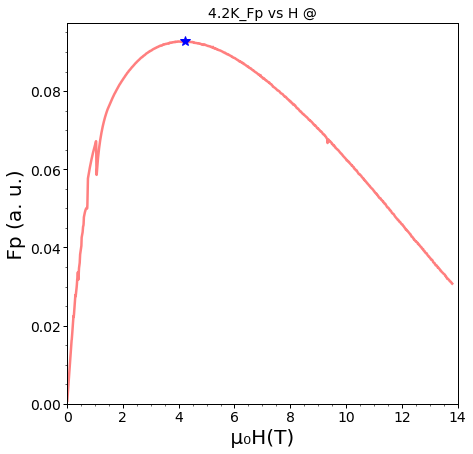

In [216]:
pltFpvsH42K(Fp,H,Hmax,Fpmax)

In [217]:
#******************************************************************************#
def pltMvsH (m,Hall,inputTemp):
#******************************************************************************#
    
    plt.figure(figsize=(7,7))   
    plt.plot(Hall,m, c = 'r', linewidth = 2.5, linestyle ='-', alpha = 0.5)
    plt.xlabel (" Field ( T ) ")
    plt.ylabel (" Moment (emu) ")
    x_lim_right = int (Hall.max())
    plt.xlim ([0.,x_lim_right])
    plt.gca().set_ylim(bottom=0)
    plt.title ("{0:.1f}K_m vs H @".format(inputTemp) +  HT) 
    plt.savefig ("{0:.1f}_mvsH.png".format(inputTemp))
    plt.show()

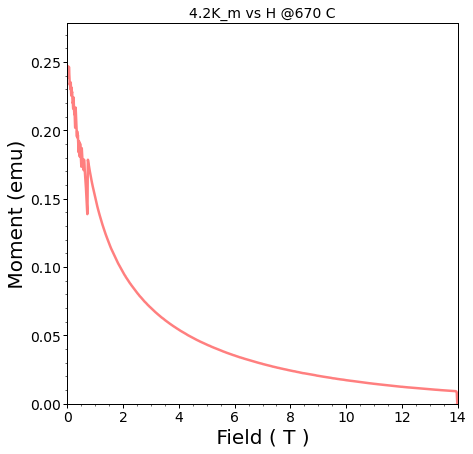

In [218]:
pltMvsH(m,Hall,T)

In [173]:
#******************************************************************************#
def pltDMvsH (dm, Hall,inputTemp):
#******************************************************************************#
    
    plt.figure(figsize=(7,7))   
    plt.plot(Hall,dm, c = 'r', linewidth = 2.5, linestyle ='-', alpha = 0.5)
    plt.xlabel (" Field ( T ) ")
    plt.ylabel (" \u0394m (emu) ")
    x_lim_right = math.ceil (Hall.max())
    plt.xlim ([0.,x_lim_right])
    plt.gca().set_ylim(bottom=0)
    plt.title ("{0:.1f}K_\u0394m vs H @".format(inputTemp) +  HT) 
    plt.savefig ("{0:.1f}_dmvsH.png".format(inputTemp))
    plt.show()

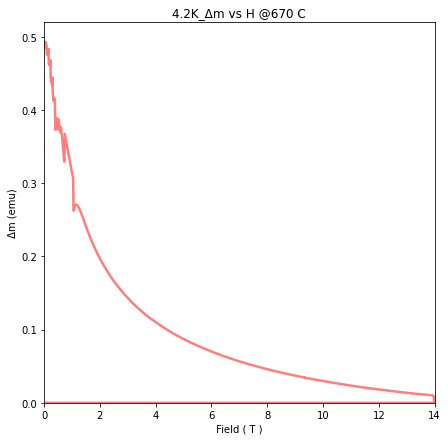

In [174]:
pltDMvsH(dm,Hall,T)

In [177]:
#******************************************************************************#
def pltKmvsH (H, Km, inputTemp):
#******************************************************************************#

    plt.figure(figsize=(7,7))   
    plt.plot(H,Km, c = 'r', linewidth = 2.5, linestyle ='-', alpha = 0.5)
    plt.xlabel (" Field ( T ) ")
    plt.ylabel (" Km (a.u.) ")
    x_lim_right = math.ceil (H.max())
    plt.xlim ([0.,x_lim_right])
    plt.gca().set_ylim(bottom=0)
    plt.title ("{0:.1f}K_Km vs H @".format(inputTemp) +  HT) 
    plt.savefig ("{0:.1f}_KmvsH.png".format(inputTemp))
    plt.show()


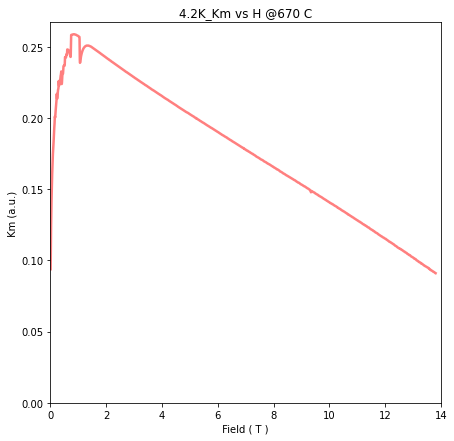

In [178]:
pltKmvsH(H,Km,T)

In [180]:
#******************************************************************************#
def pltFpnormvsHnorm (Hnorm,Fpnorm,inputTemp):
#******************************************************************************#

    plt.figure(figsize=(7,7))   
    plt.plot(Hnorm,Fpnorm, c = 'r', linewidth = 2.5, linestyle ='-', alpha = 0.5)
    plt.xlabel (" H/Hmax ")
    plt.ylabel (" Fp/Fpmax ")
    x_lim_right = math.ceil (Hnorm.max())
    plt.xlim ([0.,x_lim_right])
    plt.gca().set_ylim(bottom=0)
    plt.title ("{0:.1f}K_Fpnorm vs Hnorm @".format(inputTemp)) 
    plt.savefig ("{0:.1f}_HnormvsFpnorm.png".format(inputTemp))
    plt.show()

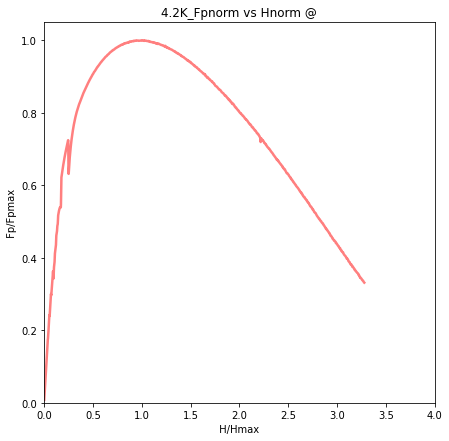

In [181]:
pltFpnormvsHnorm(Hnorm,Fpnorm,T)

In [204]:
df.head(10)

,Time,Field,Moment,Temerature,dMoment,Kramer,Jc,Fp,Km,Hnorm,Fpnorm
0,50.0,-1.9984,0.100732,4.168,0.000462,0.025548,0.000097,-0.000194,NaN,-0.474724,-0.002094
1,550.0,-1.9934,0.100467,4.168,0.000874,0.035120,0.000184,-0.000367,NaN,-0.473537,-0.003953
2,1050.0,-1.9885,0.099630,4.168,0.001849,0.051064,0.000389,-0.000774,NaN,-0.472373,-0.008347
3,1550.0,-1.9835,0.096626,4.168,0.005034,0.084201,0.001060,-0.002102,NaN,-0.471185,-0.022666
4,2050.0,-1.9784,0.090747,4.168,0.011117,0.125045,0.002340,-0.004630,NaN,-0.469973,-0.049924
5,2550.0,-1.9734,0.083100,4.168,0.018941,0.163118,0.003988,-0.007869,NaN,-0.468786,-0.084846
6,3050.0,-1.9685,0.075049,4.168,0.027173,0.195254,0.005721,-0.011261,NaN,-0.467622,-0.121420
7,3551.0,-1.9634,0.067647,4.168,0.034788,0.220783,0.007324,-0.014379,NaN,-0.466410,-0.155044
8,4051.0,-1.9584,0.061264,4.168,0.041381,0.240644,0.008712,-0.017061,NaN,-0.465222,-0.183959
9,4552.0,-1.9534,0.055769,4.168,0.047060,0.256462,0.009907,-0.019353,NaN,-0.464035,-0.208671


In [207]:
def manipulated_df(df):
    return df.to_csv("out.csv",sep="\t")

In [208]:
manipulated_df(df)

In [229]:
def multiplePlots(*dfs):
    # *dfs is a tuple of all dataframes input
    for df in dfs:
        return df

In [231]:
multiplePlots(2,3)

2

In [246]:
def sum(a,b):
    return (sum := a+b)

In [255]:
def xx(c,d):
    return c*d

In [256]:
d = sum(2,3)

In [257]:
xx(4,d)

20

In [262]:
def main():
    openHTML(html,Nb3Sn)
    writeHTMLImage(html,mvsH,"4.2_dmvsH.png")
    closeHTML(html)

def openHTML(f,title):
	f.write("""<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
""")
	f.write("<head>\n")
	f.write("<title>%s</title>\n" % title)
	f.write("</head>\n")
	f.write("<body>\n")

def writeHTMLImage(f,title, imgpath):
	f.write('<p class="aucimage">%s</p>\n' % title)
	f.write('<img src="%s" />\n' % imgpath)

def closeHTML(f):
	f.write("</body>\n")
	f.write("</html>\n")
	f.close()	